# EQUITY VARIANCE SWAP - VALUATION AND RISK ANALYSIS

Valuation and Risk of Equity Chooser Options in which the option is on a basket of stocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import FinDate
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat
from financepy.products.equity.FinEquityVarianceSwap import FinEquityVarianceSwap
from financepy.market.volatility.FinEquityVolCurve import FinEquityVolCurve

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT     #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



# Variance Swap

All the assets in the basket have the same characteristicsm

In [3]:
startDate = FinDate(2018, 3, 20)
tenor = "3M"
strike = 0.3*0.3

In [4]:
print("Strike Variance:", strike)

Strike Variance: 0.09


The strike of the variance swap is at 9%

In [5]:
volSwap = FinEquityVarianceSwap(startDate, tenor, strike)

## Valuation

In [6]:
valueDate = FinDate(2018, 3, 20)

In [7]:
r = 0.05
discountCurve = FinDiscountCurveFlat(valueDate, r)

In [8]:
stockPrice = 100.0
dividendYield = 0.0
maturityDate = startDate.addMonths(3)

In [9]:
def volSkew(K, atmVol, atmK, skew):
    v = atmVol + skew * (K-atmK)
    return v

We now define the volatility curve

In [10]:
atmVol = 0.20
atmK = 100.0#
skew = 0
strikes = np.linspace(50.0, 135.0, 18)
vols = volSkew(strikes, atmVol, atmK, skew)
volCurve = FinEquityVolCurve(valueDate, maturityDate, strikes, vols)

Text(0, 0.5, 'Volatility')

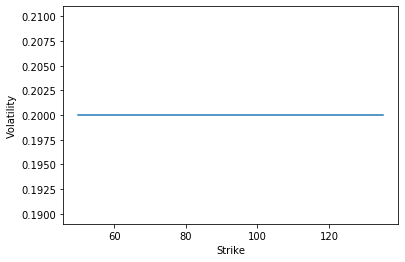

In [11]:
plt.plot(strikes, vols)
plt.xlabel("Strike")
plt.ylabel("Volatility")

In [12]:
strikeSpacing = 5.0
numCallOptions = 10
numPutOptions = 10

In [13]:
k1 = volSwap.fairStrike(valueDate, stockPrice, dividendYield,
                        volCurve, numCallOptions, numPutOptions,
                        strikeSpacing, discountCurve, False)
print("Fair strike:", k1)

Fair strike: 0.04166311057138125


In [14]:
k2 = volSwap.fairStrikeApprox(valueDate, stockPrice, strikes, vols)
print("DERMAN SKEW APPROX for K:", k2)

DERMAN SKEW APPROX for K: 0.04000000000000001


In [15]:
volSwap.printWeights()

TYPE STRIKE WEIGHT
PUT   55.00  13178.571
PUT   60.00  11066.307
PUT   65.00   9424.412
PUT   70.00   8122.824
PUT   75.00   7073.547
PUT   80.00   6215.306
PUT   85.00   5504.368
PUT   90.00   4908.841
PUT   95.00   4405.020
CALL  100.00   1921.230
CALL  105.00   3605.016
CALL  110.00   3284.404
CALL  115.00   3004.748
CALL  120.00   2759.356
CALL  125.00   2542.849
CALL  130.00   2350.865
CALL  135.00   2179.834
CALL  140.00   2026.814
CALL  145.00   1889.362


Copyright (c) 2020 Dominic O'Kane